In [1]:
import numpy as np 
np.set_printoptions(threshold=10000,suppress=True) 
import pandas as pd
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [26]:
na_values = ['na']
data_fbref = pd.read_csv('fbref/fbref_outfield_player_stats_combined_latest.csv', sep=',',na_values=na_values)
data_fbref = data_fbref.loc[data_fbref["League Name"]!='Champions-League']
data_fbref = data_fbref.loc[data_fbref["League Name"]!='Europa-League']
data_fbref = data_fbref.loc[data_fbref["League Name"]=='Ligue-1']
data_fbref = data_fbref.loc[data_fbref["Season"]=='2017-2018']
data_fbref

Player  Nation    Pos       Squad   Age    Born  MP  Starts  \
14614   Abdallah N'dour  sn SEN  DF,MF  Strasbourg  23.0  1993.0   5       3   
14615     Abdoul Camara  gn GUI  FW,MF    Guingamp  27.0  1990.0  14      12   
14616   Abdoulaye Bamba  ci CIV     DF      Angers  27.0  1990.0  18      17   
14617  Abdoulaye Diallo  sn SEN     GK      Rennes  25.0  1992.0   3       3   
14618   Abdoulaye Touré  fr FRA     MF      Nantes  23.0  1994.0  36      31   
...                 ...     ...    ...         ...   ...     ...  ..     ...   
15160   Zaydou Youssouf  fr FRA     FW    Bordeaux  18.0  1999.0   6       1   
15161  Zinédine Machach  fr FRA  FW,MF    Toulouse  21.0  1996.0   4       2   
15162         Ádám Lang  hu HUN     DF       Dijon  24.0  1993.0   3       3   
15163    Ángel Di María  ar ARG     FW   Paris S-G  29.0  1988.0  30      26   
15164     Étienne Didot  fr FRA     MF    Guingamp  34.0  1983.0  23      21   

          Min   90s  Gls  Ast  G-PK  PK  PKatt  CrdY  CrdR  Gls/90  Ast/90  \
14614   254.0   2.8    0    0     0   0      0     2     1    0.00    0.00   
14615   975.0  10.8    2    1     2   0      0     0     0    0.18    0.09   
14616  1533.0  17.0    0    0     0   0      0     2     0    0.00    0.00   
14617   270.0   3.0    0    0     0   0      0     0     0    0.00    0.00   
14618  2809.0  31.2    1    1     1   0      0     3     0    0.03    0.03   
...       ...   ...  ...  ...   ...  ..    ...   ...   ...     ...     ...   
15160   131.0   1.5    0    0     0   0      0     2     0    0.00    0.00   
15161   192.0   2.1    1    0     1   0      0     2     0    0.47    0.00   
15162   233.0   2.6    0    0     0   0      0     1     2    0.00    0.00   
15163  2108.0  23.4   11    7    11   0      0     1     0    0.47    0.30   
15164  1620.0  18.0    2    1     2   0      0     4     0    0.11    0.06   

        G+A  G-PK/90  G+A-PK    xG  npxG   xA  npxG+xA  xG/90  xA/90  xG+xA  \
14614  0.00     0.00    0.00   0.0   0.0  0.2      0.2   0.00   0.06   0.06   
14615  0.28     0.18    0.28   1.3   1.3  0.8      2.1   0.13   0.08   0.21   
14616  0.00     0.00    0.00   0.1   0.1  0.3      0.4   0.01   0.02   0.03   
14617  0.00     0.00    0.00   0.0   0.0  0.0      0.0   0.00   0.00   0.00   
14618  0.06     0.03    0.06   1.5   1.5  0.7      2.2   0.05   0.02   0.07   
...     ...      ...     ...   ...   ...  ...      ...    ...    ...    ...   
15160  0.00     0.00    0.00   0.1   0.1  0.1      0.2   0.09   0.04   0.12   
15161  0.47     0.47    0.47   0.2   0.2  0.1      0.3   0.07   0.06   0.13   
15162  0.00     0.00    0.00   0.0   0.0  0.0      0.0   0.00   0.00   0.00   
15163  0.77     0.47    0.77  11.8  11.8  7.9     19.8   0.50   0.34   0.84   
15164  0.17     0.11    0.17   0.5   0.5  0.8      1.3   0.03   0.04   0.07   

       npxG/90  npxG+xA/90    Sh  SoT  SoT%  Sh/90  SoT/90  G/Sh  G/SoT  Dist  \
14614     0.00        0.06   0.0    0   NaN   0.00    0.00   NaN    NaN   NaN   
14615     0.13        0.21  19.0    6  31.6   1.75    0.55  0.11   0.33  19.6   
14616     0.01        0.03   4.0    1  25.0   0.23    0.06  0.00   0.00  28.8   
14617     0.00        0.00   0.0    0   NaN   0.00    0.00   NaN    NaN   NaN   
14618     0.05        0.07  41.0   13  31.7   1.31    0.42  0.02   0.08  26.0   
...        ...         ...   ...  ...   ...    ...     ...   ...    ...   ...   
15160     0.09        0.12   3.0    0   0.0   2.06    0.00  0.00    NaN  21.2   
15161     0.07        0.13   3.0    1  33.3   1.41    0.47  0.33   1.00  16.3   
15162     0.00        0.00   0.0    0   NaN   0.00    0.00   NaN    NaN   NaN   
15163     0.50        0.84  98.0   39  39.8   4.18    1.67  0.11   0.28  18.7   
15164     0.03        0.07  13.0    4  30.8   0.72    0.22  0.15   0.50  25.4   

        FK  npxG/Sh  G-xG  np:G-xG     Cmp     Att  Cmp%  TotDist  PrgDist  \
14614  0.0      NaN   0.0      0.0    86.0   125.0  68.8   1552.0    673.0   
14615  1.0     0.07   0.7      0.7   223.

In [27]:
mycolumns = ['Player','90s','CrdY','CrdR','Gls/90','Ast/90','xG/90','xA/90','Sh/90','SoT/90','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','SCA90','PassLive','PassDead','Drib','Fld','Def','GCA90','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [28]:
data_fbref_ok=data_fbref[mycolumns]
data_fbref_ok

Player   90s  CrdY  CrdR  Gls/90  Ast/90  xG/90  xA/90  \
14614   Abdallah N'dour   2.8     2     1    0.00    0.00   0.00   0.06   
14615     Abdoul Camara  10.8     0     0    0.18    0.09   0.13   0.08   
14616   Abdoulaye Bamba  17.0     2     0    0.00    0.00   0.01   0.02   
14617  Abdoulaye Diallo   3.0     0     0    0.00    0.00   0.00   0.00   
14618   Abdoulaye Touré  31.2     3     0    0.03    0.03   0.05   0.02   
...                 ...   ...   ...   ...     ...     ...    ...    ...   
15160   Zaydou Youssouf   1.5     2     0    0.00    0.00   0.09   0.04   
15161  Zinédine Machach   2.1     2     0    0.47    0.00   0.07   0.06   
15162         Ádám Lang   2.6     1     2    0.00    0.00   0.00   0.00   
15163    Ángel Di María  23.4     1     0    0.47    0.30   0.50   0.34   
15164     Étienne Didot  18.0     4     0    0.11    0.06   0.03   0.04   

       Sh/90  SoT/90   FK     Cmp     Att  TotDist  PrgDist  Cmp_short  \
14614   0.00    0.00  0.0    86.0   125.0   1552.0    673.0       47.0   
14615   1.75    0.55  1.0   223.0   313.0   3301.0    793.0      129.0   
14616   0.23    0.06  0.0   621.0   810.0  10272.0   4933.0      294.0   
14617   0.00    0.00  0.0    41.0    65.0   1244.0    727.0        5.0   
14618   1.31    0.42  2.0  1070.0  1367.0  20350.0   6333.0      431.0   
...      ...     ...  ...     ...     ...      ...      ...        ...   
15160   2.06    0.00  0.0    36.0    52.0    658.0    100.0       14.0   
15161   1.41    0.47  0.0    30.0    48.0    529.0    196.0       17.0   
15162   0.00    0.00  0.0   100.0   117.0   2377.0    613.0       21.0   
15163   4.18    1.67  8.0   906.0  1263.0  15805.0   4505.0      467.0   
15164   0.72    0.22  0.0   798.0  1018.0  14764.0   4814.0      337.0   

       Att_short  Cmp_medium  Att_medium  Cmp_long  Att_long    KP    1/3  \
14614       53.0        25.0        37.0      13.0      30.0   5.0    7.0   
14615      160.0        71.0       100.0      14.0      33.0   9.0    9.0   
14616      326.0       287.0       348.0      33.0     104.0   6.0   43.0   
14617        5.0        19.0        19.0      16.0      40.0   0.0    0.0   
14618      509.0       440.0       531.0     169.0     263.0  18.0  150.0   
...          ...         ...         ...       ...       ...   ...    ...   
15160       19.0        14.0        18.0       6.0      12.0   1.0    2.0   
15161       20.0         8.0        15.0       4.0       8.0   1.0    2.0   
15162       26.0        54.0        56.0      24.0      32.0   0.0    6.0   
15163      544.0       301.0       413.0     115.0     237.0  55.0   67.0   
15164      374.0       340.0       406.0     102.0     201.0  13.0   85.0   

        PPA  CrsPA   Prog  SCA90  PassLive  PassDead  Drib   Fld  Def  GCA90  \
14614   3.0    2.0   10.0   2.85       6.0       0.0   0.0   2.0  0.0   0.00   
14615   9.0    3.0   20.0   2.03      14.0       1.0   2.0   1.0  1.0   0.10   
14616   5.0    2.0   51.0   0.94      13.0       2.0   0.0   1.0  0.0   0.12   
14617   0.0    0.0    0.0   0.00       0.0       0.0   0.0   0.0  0.0   0.00   
14618  15.0    4.0  140.0   2.47      50.0       0.0   6.0  12.0  5.0   0.19   
...     ...    ...    ...    ...       ...       ...   ...   ...  ...    ...   
15160   1.0    0.0    2.0   3.44       4.0       0.0   0.0   0.0  1.0   0.69   
15161   1.0    1.0    4.0   1.87       2.0       0.0   1.0   0.0  0.0   0.00   
15162   0.0    0.0    7.0   0.00       0.0       0.0   0.0   0.0  0.0   0.00   
15163  49.0   11.0  114.0   4.60      74.0      19.0   6.0   4.0  1.0   0.60   
15164  11.0    4.0   78.0   1.89      26.0       6.0   0.0   1.0  0.0   0.17   

       PassLive_AMB  PassDead_AMB  Drib_AMB  Fld_AMB  Def_AMB   Tkl  TklW  \
14614           0.0           0.0       0.0      0.0      0.0  10.0   4.0   
14615           1.0           0.0       0.0      0.0      0.0   9.0   4.0   
14616           1.0           0.0       0.0      1.0      0.0  20.0   9.0   
14617           0.0           0.0

In [29]:
liste_90 = ['CrdY','CrdR','FK','Cmp','Att',\
             'TotDist','PrgDist','Cmp_short','Att_short','Cmp_medium','Att_medium','Cmp_long','Att_long','KP','1/3','PPA',\
             'CrsPA','Prog','PassLive','PassDead','Drib','Fld','Def','PassLive_AMB','PassDead_AMB','Drib_AMB',\
            'Fld_AMB','Def_AMB','Tkl','TklW','Def 3rd','Mid 3rd','Att 3rd','Tkl_dribble','Past','Succ','Def 3rd_pression', \
             'Mid 3rd_pression','Att 3rd_pression','Touches','Def Pen','Att Pen','Carries','CPA','Fls']

In [30]:
data_fbref_ok_flt = data_fbref_ok.loc[data_fbref_ok['90s'] > 6]  

In [31]:
for i in liste_90:
    data_fbref_ok_flt[str(i)]=data_fbref_ok_flt[str(i)]/data_fbref_ok_flt['90s']
del data_fbref_ok_flt['90s']
data_fbref_ok_flt

Player      CrdY      CrdR  Gls/90  Ast/90  xG/90  xA/90  \
14615    Abdoul Camara  0.000000  0.000000    0.18    0.09   0.13   0.08   
14616  Abdoulaye Bamba  0.117647  0.000000    0.00    0.00   0.01   0.02   
14618  Abdoulaye Touré  0.096154  0.000000    0.03    0.03   0.05   0.02   
14620   Adama Diakhaby  0.210526  0.105263    0.21    0.21   0.21   0.08   
14621    Adama Mbengue  0.112994  0.056497    0.00    0.00   0.03   0.10   
...                ...       ...       ...     ...     ...    ...    ...   
15155  Youssouf Sabaly  0.087209  0.000000    0.00    0.15   0.01   0.12   
15157   Yuri Berchiche  0.209424  0.000000    0.10    0.16   0.03   0.12   
15159    Yves Bissouma  0.172414  0.000000    0.12    0.00   0.14   0.03   
15163   Ángel Di María  0.042735  0.000000    0.47    0.30   0.50   0.34   
15164    Étienne Didot  0.222222  0.000000    0.11    0.06   0.03   0.04   

       Sh/90  SoT/90        FK        Cmp        Att     TotDist     PrgDist  \
14615   1.75    0.55  0.092593  20.648148  28.981481  305.648148   73.425926   
14616   0.23    0.06  0.000000  36.529412  47.647059  604.235294  290.176471   
14618   1.31    0.42  0.064103  34.294872  43.814103  652.243590  202.980769   
14620   1.48    0.42  0.000000  14.736842  22.526316  212.947368   41.157895   
14621   0.90    0.06  0.000000  28.700565  46.384181  552.259887  318.022599   
...      ...     ...       ...        ...        ...         ...         ...   
15155   0.32    0.06  0.000000  45.872093  58.517442  758.720930  330.348837   
15157   0.58    0.16  0.000000  50.732984  59.109948  782.722513  275.602094   
15159   2.48    0.40  0.114943  49.367816  59.252874  898.793103  251.839080   
15163   4.18    1.67  0.341880  38.717949  53.974359  675.427350  192.521368   
15164   0.72    0.22  0.000000  44.333333  56.555556  820.222222  267.444444   

       Cmp_short  Att_short  Cmp_medium  Att_medium  Cmp_long   Att_long  \
14615  11.944444  14.814815    6.574074    9.259259  1.296296   3.055556   
14616  17.294118  19.176471   16.882353   20.470588  1.941176   6.117647   
14618  13.814103  16.314103   14.102564   17.019231  5.416667   8.429487   
14620   8.842105  11.578947    4.315789    6.736842  1.052632   2.210526   
14621  11.525424  14.689266   13.333333   18.022599  3.389831  10.225989   
...          ...        ...         ...         ...       ...        ...   
15155  23.633721  26.976744   17.529070   21.715116  3.808140   7.063953   
15157  26.806283  29.476440   19.895288   22.984293  2.774869   3.717277   
15159  20.804598  23.678161   20.459770   23.390805  6.436782   9.252874   
15163  19.957265  23.247863   12.863248   17.649573  4.914530  10.128205   
15164  18.722222  20.777778   18.888889   22.555556  5.666667  11.166667   

             KP       1/3       PPA     CrsPA      Prog  SCA90  PassLive  \
14615  0.833333  0.833333  0.833333  0.277778  1.851852   2.03  1.296296   
14616  0.352941  2.529412  0.294118  0.117647  3.000000   0.94  0.764706   
14618  0.576923  4.807692  0.480769  0.128205  4.487179   2.47  1.602564   
14620  0.736842  0.947368  0.421053  0.210526  0.947368   1.48  0.842105   
14621  0.621469  2.937853  0.903955  0.451977  3.785311   1.81  1.016949   
...         ...       ...       ...       ...       ...    ...       ...   
15155  1.162791  4.156977  1.569767  0.843023  4.127907   1.95  1.715116   
15157  0.942408  3.193717  0.994764  0.418848  4.345550   1.99  1.675393   
15159  0.689655  4.827586  0.402299  0.000000  5.977011   2.36  1.609195   
15163  2.350427  2.863248  2.094017  0.470085  4.871795   4.60  3.162393   
15164  0.722222  4.722222  0.611111  0.222222  4.333333   1.89  1.444444   

       PassDead      Drib       Fld       Def  GCA90  PassLive_AMB  \
14615  0.092593  0.185185  0.092593  0.092593   0.10      0.092593   
14616  0.117647  0.000000  0.058824  0.000000   0.12      0.058824   
14618  0.000000  0.192308  0.384615  0.160256   0.19      0.160256   
14620  0.000000  0.000000  0.421053 

In [32]:
X = data_fbref_ok_flt.iloc[:, 1:].values
labels = data_fbref_ok_flt.iloc[:, 0].values
display(X)

array([[ 0.        ,  0.        ,  0.18      , ..., 30.09259259,
         1.38888889,  0.74074074],
       [ 0.11764706,  0.        ,  0.        , ..., 32.11764706,
         0.        ,  1.17647059],
       [ 0.09615385,  0.        ,  0.03      , ..., 37.78846154,
         0.16025641,  1.85897436],
       ...,
       [ 0.17241379,  0.        ,  0.12      , ..., 52.18390805,
         0.51724138,  2.18390805],
       [ 0.04273504,  0.        ,  0.47      , ..., 50.12820513,
         1.41025641,  0.38461538],
       [ 0.22222222,  0.        ,  0.11      , ..., 39.88888889,
         0.11111111,  1.55555556]])

In [33]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit(X)
Xnorm=SS.transform(X)
Xnorm

array([[-1.50635356, -0.34804548,  0.3176674 , ..., -0.35544973,
         2.66740069, -0.8369865 ],
       [-0.53214146, -0.34804548, -0.68169707, ..., -0.19892867,
        -0.79232289, -0.19533311],
       [-0.71012252, -0.34804548, -0.51513633, ...,  0.23938146,
        -0.39312401,  0.8097182 ],
       ...,
       [-0.07862893, -0.34804548, -0.01545409, ...,  1.35203822,
         0.49612589,  1.28821377],
       [-1.1524731 , -0.34804548,  1.92775462, ...,  1.19314828,
         2.7206272 , -1.36141475],
       [ 0.33382485, -0.34804548, -0.07097434, ...,  0.40172827,
        -0.515545  ,  0.36290533]])

In [34]:
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
pca = PCA(n_components=53)
pca.fit(Xnorm)

PCA(n_components=53)

In [35]:
pca.explained_variance_ratio_

array([0.28472866, 0.26505311, 0.09726608, 0.04692274, 0.03738298,
       0.02713245, 0.02441634, 0.0194449 , 0.01920333, 0.01817308,
       0.01618011, 0.01379616, 0.01332118, 0.01170861, 0.01024125,
       0.00942417, 0.00808593, 0.00720108, 0.00711203, 0.00627862,
       0.00559424, 0.00551732, 0.00489863, 0.00467091, 0.00422027,
       0.00370629, 0.00363878, 0.0031975 , 0.00307305, 0.00264619,
       0.00223573, 0.00211374, 0.00166531, 0.00150324, 0.00139733,
       0.00124034, 0.00090052, 0.00075372, 0.0007145 , 0.00067914,
       0.00054381, 0.00050962, 0.00044982, 0.00041281, 0.00035332,
       0.00015116, 0.00004964, 0.00003363, 0.00003195, 0.00001401,
       0.00000916, 0.00000147, 0.        ])

In [36]:
pca = PCA(n_components=3)
pca.fit(Xnorm)
X_pca = pca.transform(Xnorm)
X_pca

array([[ 0.3236943 , -3.91961121, -0.07699973],
       [-2.72314754,  0.80892703,  0.05727046],
       [ 1.04055956,  2.0959242 , -2.44036429],
       [ 2.25691686, -3.83651645, -3.23262204],
       [ 0.20762497,  3.30779313, -3.76034025],
       [ 1.5116477 , -6.11372722, -2.21803198],
       [-5.05495942, -0.37344295,  1.40739232],
       [-3.73273819,  2.40531127,  2.46866396],
       [ 0.93855234, -3.53713366, -2.31462509],
       [ 2.6497679 ,  7.10842906,  2.34902152],
       [-0.08822253,  6.16785792, -0.77161765],
       [ 2.84422702,  1.08718443, -2.42119455],
       [ 4.49650615, -5.70858604,  0.90990853],
       [-7.70070809, -3.68608864,  3.47058926],
       [-3.78343215,  2.37860086, -1.11053105],
       [-7.60069353, -4.71750026,  2.72160719],
       [ 1.21828766, -7.27213916, -1.49769432],
       [-7.77140827, -4.27353009,  3.21033997],
       [-0.3266262 ,  0.57418708, -3.31730935],
       [ 4.55513314, -3.3488812 ,  2.55155123],
       [ 1.75858497,  2.35464102, -1.352

In [37]:
1/np.sqrt(52)

0.1386750490563073

In [38]:
pca.components_

array([[ 0.03266129, -0.00992143,  0.14783282,  0.18302375,  0.15189107,
         0.21809926,  0.18414004,  0.17226232,  0.1224315 ,  0.0393864 ,
         0.05089991, -0.03332626, -0.10882682,  0.13368039,  0.15110493,
        -0.01533494,  0.00484789, -0.10500979, -0.11826964,  0.22199906,
         0.06656837,  0.20420138,  0.11045343,  0.12707181,  0.24180161,
         0.23382445,  0.12755251,  0.17255253,  0.16941995,  0.10052758,
         0.21376458,  0.19589103,  0.10435594,  0.13278639,  0.10503402,
         0.04927446,  0.05381907,  0.06584025, -0.01354597,  0.08540946,
         0.14481218,  0.02846846,  0.10602102,  0.16232191,  0.02116751,
         0.15804074,  0.17617385,  0.08407447, -0.18568902,  0.17575392,
         0.12471814,  0.18280151,  0.10697238],
       [ 0.07199513,  0.01759232, -0.13783788, -0.02244021, -0.16195482,
        -0.01553947, -0.13350929, -0.13954018, -0.02114033,  0.24109981,
         0.2455945 ,  0.23333133,  0.17919068,  0.18823332,  0.17741655,
   

Text(0.5, 1.0, 'Circle of Correlations')

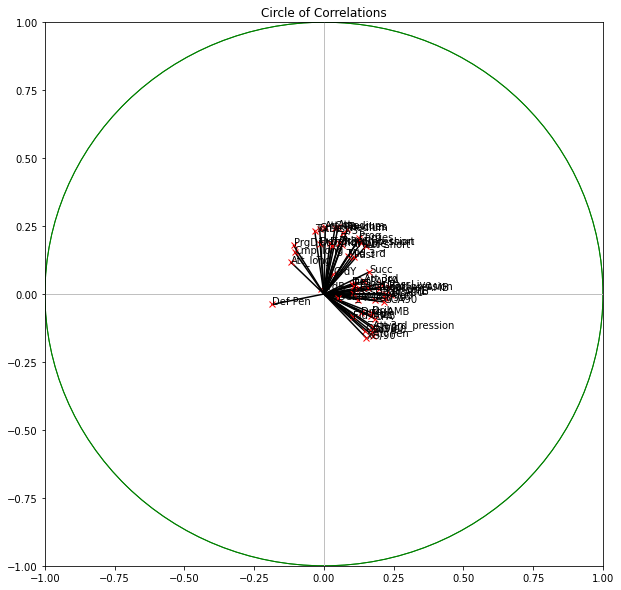

In [39]:
coef = np.transpose(pca.components_)
cols = ['y'+str(x+1) for x in range(3)]

pc_infos = pd.DataFrame(coef,columns=cols ,index=data_fbref_ok_flt.iloc[:,1:].columns)

plt.Circle((0,0),radius=10, color='g', fill=False)
circle1=plt.Circle((0,0),radius=1, color='g', fill=False)
# Ajouter les axes et donner la limite pour chaque axe
fig, axes= plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
fig.gca().add_artist(circle1)
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
axes.add_artist(circle1)
# Affichage de chaque variable explicative dans la cercle
for idx in range(len(pc_infos["y1"])):
    x = pc_infos["y1"][idx]
    y = pc_infos["y2"][idx]
    plt.plot([0.0,x],[0.0,y],'k-')
    plt.plot(x, y, 'rx')
    plt.annotate(pc_infos.index[idx], xy=(x,y))
plt.xlim((-1,1))
plt.ylim((-1,1))
plt.title("Circle of Correlations")


In [40]:
import matplotlib.colors as colors
from matplotlib.cm import bwr as cmap
import matplotlib.patches as mpatches

def print_top_comp(components, feature_names, n_top_comp):
    taille=feature_names.shape[0]
    seuil=1/np.sqrt(taille)
    for comp_idx, topic in enumerate(components):
        Y=np.abs(topic)
        feature_pos=feature_names[topic>seuil]
        feature_neg=feature_names[topic<=-seuil]
        n_top_comp_pos=min(n_top_comp,feature_pos.shape[0])
        n_top_comp_neg=min(n_top_comp,feature_neg.shape[0])


        feature_pos=feature_names[topic.argsort()[::-1][:n_top_comp_pos]]
        feature_neg=feature_names[topic.argsort()[:n_top_comp_neg]]
        fea=np.concatenate((feature_pos,feature_neg))
        com_pos=np.sort(topic)[::-1][:n_top_comp_pos]
        com_neg=np.sort(topic)[:n_top_comp_neg]
        com=np.concatenate((com_pos,com_neg))

                
        c_normal = colors.PowerNorm(1,vmin=min(com),vmax=max(com))
        _COLORS = cmap(c_normal(com))

      
        components = pd.DataFrame(np.array(com),index =fea) 
        fig, ax = plt.subplots(figsize = (5,3))
        # Plot the feature weights as a function of the components
        components.plot(ax = ax, kind = 'bar',align = "center", color=_COLORS)
        #plt.xlabel("Dimension #%d " % comp_idx)
        ax.set_ylabel("Feature Weights") 
        red_patch = mpatches.Patch(color='red', label="Variable-%d " % (comp_idx+1))
        ax.legend(handles=[red_patch])
        plt.show()

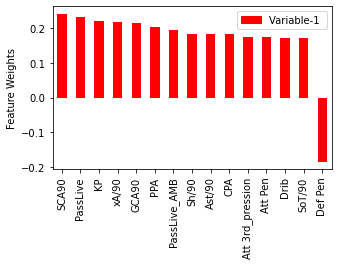

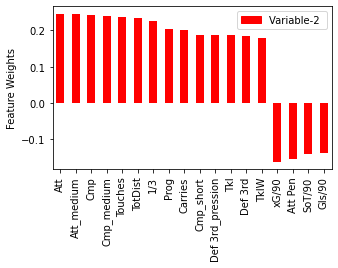

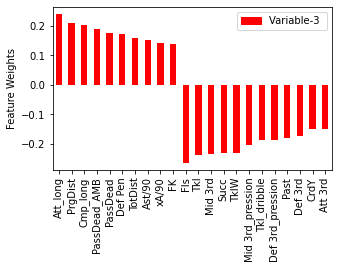

In [41]:
print_top_comp(pca.components_,data_fbref_ok_flt.columns[1:],14)

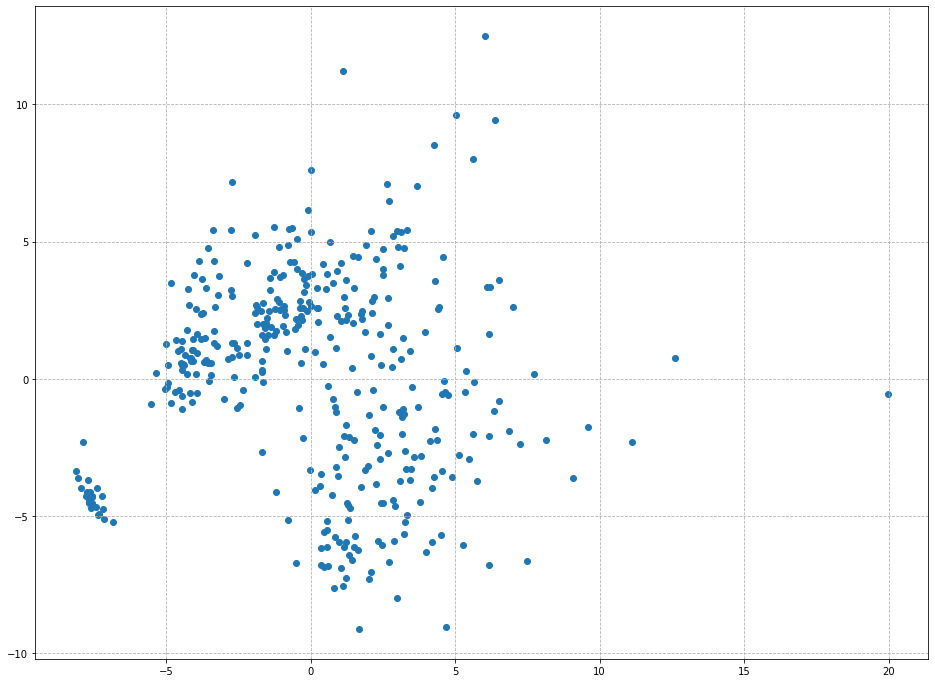

In [42]:
import matplotlib
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
plt.scatter(X_pca[:, 0], X_pca[:, 1])
#for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    #plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')

plt.show()

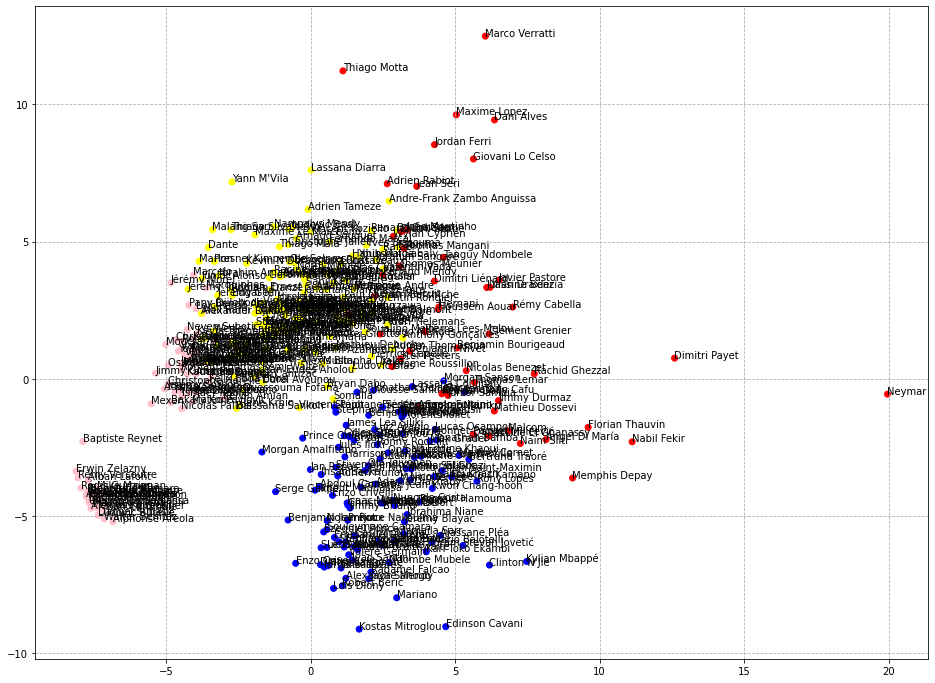

In [46]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X_pca)
clustering=kmeans.labels_
colors = ['red','yellow','blue','pink']
plt.figure(figsize=(16,12))
plt.grid(True,which="both", linestyle='--')
plt.scatter(X_pca[:, 0], X_pca[:, 1], c= clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(labels, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.show()